In [3]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#методы
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [4]:
#загружаем датасет
df = pd.read_csv("yandex_tracks_top100.csv")

In [5]:
#предобработка(удаляем ненужные колонки)
df = df.drop(columns=["name", "track_len", "link", "artist(s)"])

In [6]:
#преобразовываем жанры в числовые значения
le = LabelEncoder()
df["genre"] = le.fit_transform(df["genre"])

In [7]:
#разделяем данные на целевую и нет
X = df.drop("genre", axis=1)
y = df["genre"]

In [8]:
#применим стандартное масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#разбиваем набор данных на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

In [10]:
def plot_confusion_matrix(model_name, y_true, y_pred):
    labels = np.arange(len(le.classes_))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.tight_layout()
    plt.show()

Naive Bayes:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.08      0.14        13
           7       0.38      0.50      0.43         6

    accuracy                           0.20        20
   macro avg       0.28      0.12      0.11        20
weighted avg       0.76      0.20      0.22        20



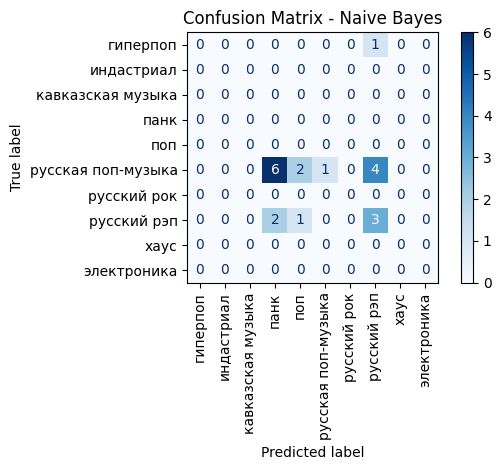

In [11]:
#наивный Байес
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Naive Bayes:")
print(classification_report(y_test, pred, zero_division=0))
plot_confusion_matrix("Naive Bayes", y_test, pred)

Decision Tree:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.88      0.54      0.67        13
           7       0.40      0.67      0.50         6
           9       0.00      0.00      0.00         0

    accuracy                           0.55        20
   macro avg       0.32      0.30      0.29        20
weighted avg       0.69      0.55      0.58        20



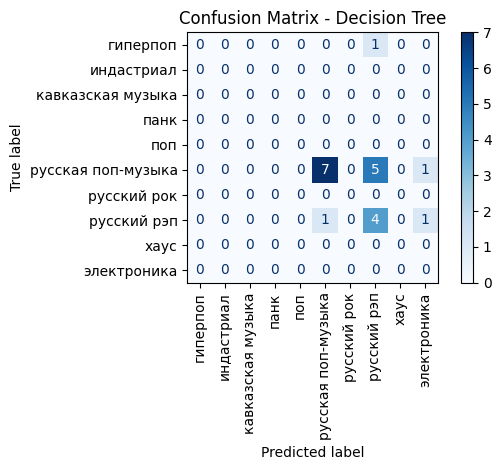

In [12]:
#дерево решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
pred_dt = model.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, pred_dt, zero_division=0))
plot_confusion_matrix("Decision Tree", y_test, pred_dt)

Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       1.00      0.46      0.63        13
           7       0.38      0.83      0.53         6
           9       0.00      0.00      0.00         0

    accuracy                           0.55        20
   macro avg       0.35      0.32      0.29        20
weighted avg       0.77      0.55      0.57        20



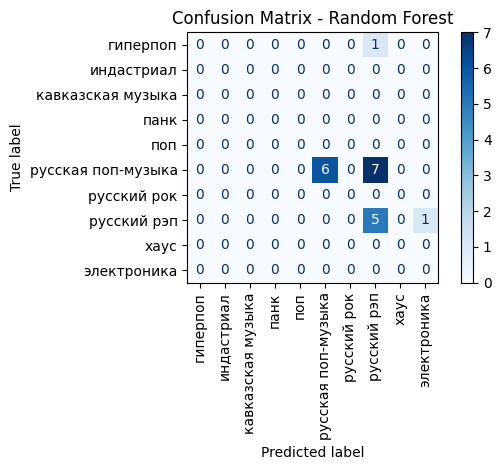

In [13]:
#случайный лес
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
pred_rf = model.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, pred_rf, zero_division=0))
plot_confusion_matrix("Random Forest", y_test, pred_rf)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       1.00      0.54      0.70        13
           7       0.46      1.00      0.63         6

    accuracy                           0.65        20
   macro avg       0.49      0.51      0.44        20
weighted avg       0.79      0.65      0.64        20



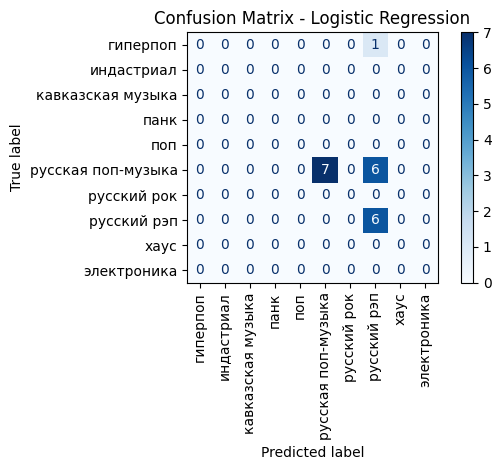

In [14]:
#логистическая регрессия
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
pred_lr = model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, pred_lr, zero_division=0))
plot_confusion_matrix("Logistic Regression", y_test, pred_lr)

SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.75      0.69      0.72        13
           7       0.38      0.50      0.43         6

    accuracy                           0.60        20
   macro avg       0.38      0.40      0.38        20
weighted avg       0.60      0.60      0.60        20



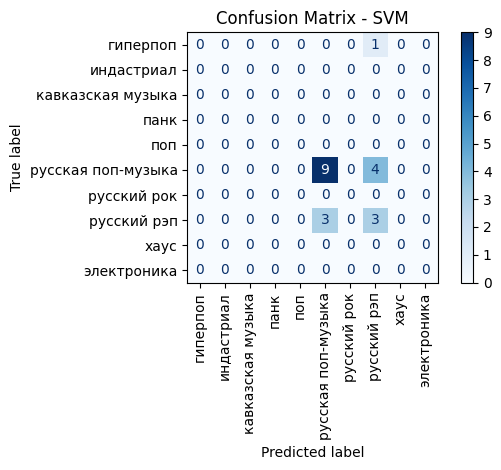

In [15]:
#SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
pred_svm = model.predict(X_test)

print("SVM:")
print(classification_report(y_test, pred_svm, zero_division=0))
plot_confusion_matrix("SVM", y_test, pred_svm)

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.67      0.31      0.42        13
           6       0.00      0.00      0.00         0
           7       0.30      0.50      0.38         6
           9       0.00      0.00      0.00         0

    accuracy                           0.35        20
   macro avg       0.14      0.12      0.11        20
weighted avg       0.52      0.35      0.39        20



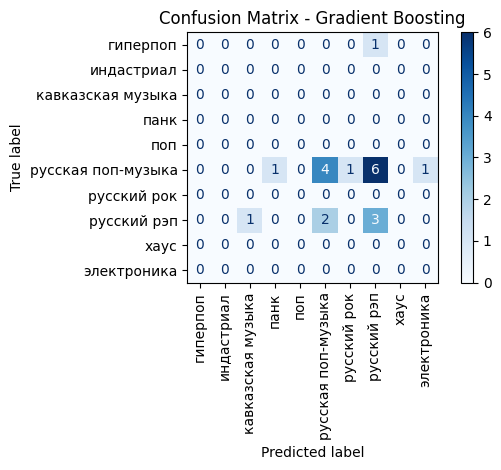

In [18]:
#бустинг
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)

print("Gradient Boosting:")
print(classification_report(y_test, pred_gb, zero_division=0))
plot_confusion_matrix("Gradient Boosting", y_test, pred_gb)